In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set professional aesthetics
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (12, 7)

# 1. Load Data
try:
    conn = sqlite3.connect('universities.db')
    df = pd.read_sql("SELECT * FROM courses", conn)
    conn.close()
    
    # --- THE PRO FIX: CLEANING NOISY DATA ---
    # Drop rows where the title is likely a navigation link, not a course
    junk_keywords = ['Fees', 'Funding', 'Contact', 'Apply', 'Study', 'Menu']
    initial_count = len(df)
    df = df[~df['title'].str.contains('|'.join(junk_keywords), case=False)]
    
    print(f"✅ Loaded {initial_count} raw records.")
    print(f"🧹 Cleaned {initial_count - len(df)} non-course items.")
    print(f"🎯 Final Dataset: {len(df)} valid courses.")
    display(df.head())

except Exception as e:
    print(f"❌ Error: {e}")
    print("⚠️  Run 'python uni_scraper.py' first!")

✅ Loaded 1 raw records.
🧹 Cleaned 1 non-course items.
🎯 Final Dataset: 0 valid courses.


,title,url,raw_fee,fee_val,cluster


In [2]:
def extract_degree(title):
    title = str(title).upper()
    if 'MSC' in title: return 'MSc'
    if 'MA ' in title or title.endswith('MA'): return 'MA'
    if 'MBA' in title: return 'MBA'
    if 'MRES' in title: return 'MRes'
    if 'PHD' in title: return 'PhD'
    return 'Other'

df['degree_type'] = df['title'].apply(extract_degree)

print("🎓 Course Breakdown by Degree:")
print(df['degree_type'].value_counts())

🎓 Course Breakdown by Degree:
Series([], Name: count, dtype: int64)


/var/folders/gm/jg4dyb11529f18dsy81vttfc0000gn/T/ipykernel_89942/337769851.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['£{:,.0f}'.format(x) for x in current_values])


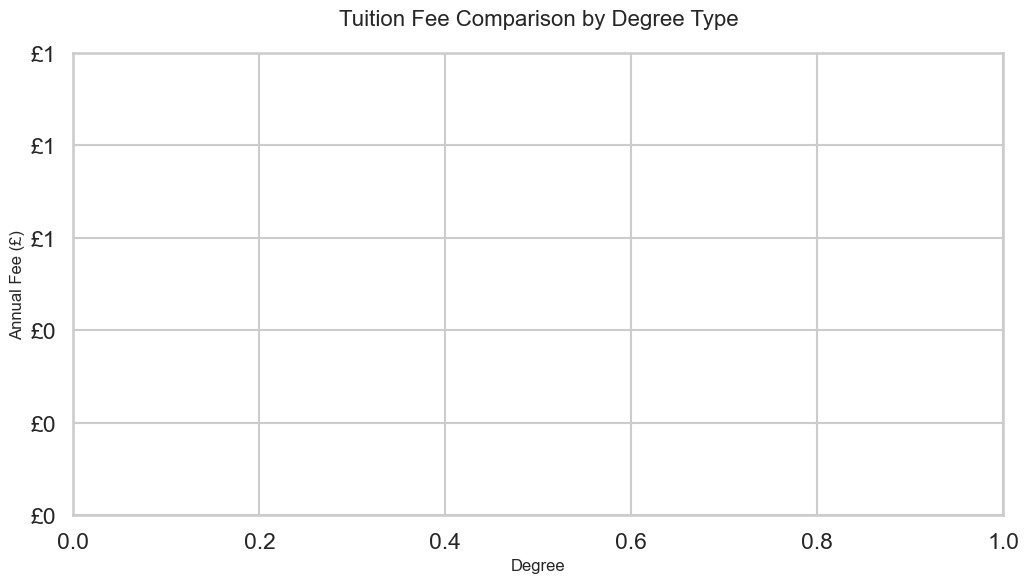

In [3]:
plt.figure(figsize=(12, 6))

# Order the plot by median price
order = df.groupby('degree_type')['fee_val'].median().sort_values(ascending=False).index

sns.boxplot(data=df, x='degree_type', y='fee_val', order=order, palette='Blues_r')
plt.title('Tuition Fee Comparison by Degree Type', fontsize=16, pad=20)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Annual Fee (£)', fontsize=12)

# Format y-axis with currency
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['£{:,.0f}'.format(x) for x in current_values])

plt.show()

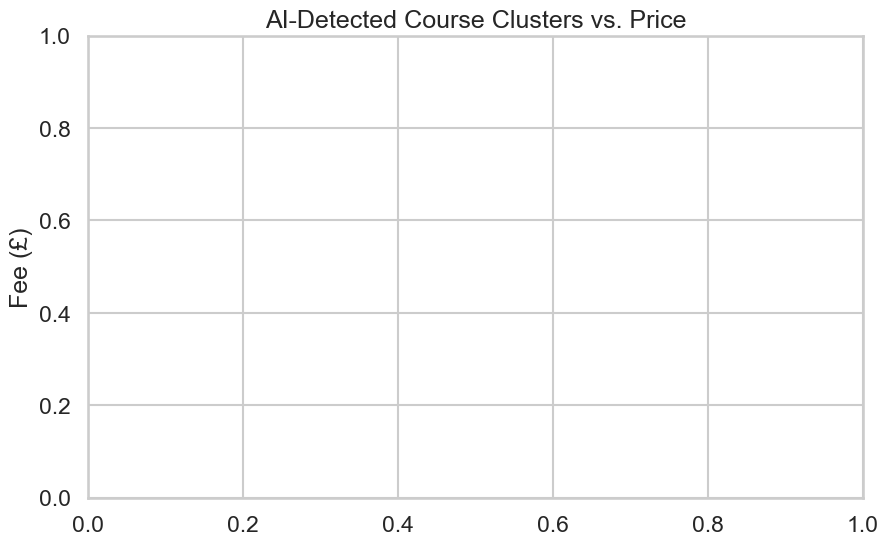

🔍 INSPECTING THE AI CLUSTERS:


In [4]:
# Visualize the AI Clusters
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='cluster', y='fee_val', hue='cluster', palette='viridis', jitter=True, alpha=0.6)
plt.title('AI-Detected Course Clusters vs. Price')
plt.ylabel('Fee (£)')
plt.show()

print("🔍 INSPECTING THE AI CLUSTERS:")
print("="*40)
for i in sorted(df['cluster'].unique()):
    cluster_subset = df[df['cluster']==i]
    avg_price = cluster_subset['fee_val'].mean()
    print(f"\n📂 CLUSTER {i} (Avg: £{avg_price:,.0f})")
    print(f"   Count: {len(cluster_subset)}")
    print(f"   Sample Titles: {cluster_subset['title'].sample(min(3, len(cluster_subset))).values}")